# Some important admin and homework for next time.


1. __Important point number 1__. We are reaching the mid-term of the semester and it is time for some reflection :) I want to know from you guys how the class is going. This is super important for me to make sure that the second half of the semester goes well. Before working on the material for today, please __fill [the mid-term survery ](https://docs.google.com/forms/d/e/1FAIpQLSc79NAmXoPfYjmVyVgCDUdyK8narAOuR-CmgYhQM6h3vRZfuA/viewform?usp=sf_link)__ on Google Forms. I promise it should not take more than 5 minutes. 


2. __Important point number 2__. We are slowly approaching the time when you guys will work on your own project. There are still a couple of classes to go, but by now you have a good idea of the methods and types of questions we work with in this class. And I would like to start discussing your ideas. Make sure you __complete Exercise 5 (at the end of this notebook) before next Wednesday__. We will take some time to talk about it next time. 


# Overview of today's class.

This week's curriculum is about text analysis. The overview is

* Tricks for raw text (NLPP Chapter 3) and finding the important words in a document (TF-IDF)
* Apply these tricks to study the content of submissions 

In the first part, we will take a quick tour of NLPP's chapter 3, which is boring, but an amazing resource that you'll keep returning to. Then we'll talk about how we can use simple statistics to get text to show us what it's all about. We will even do a little visualization. 


# Part 1 - Processing real text (from out on the inter-webs)

Ok. So Chapter 3 in NLPP is all about working with text from the real world. Getting text from this internet, cleaning it, tokenizing, modifying (e.g. stemming, converting to lower case, etc) to get the text in shape to work with the NLTK tools you've already learned about - and many more. In the process we'll learn more about regular expressions, as well as unicode; something we've already been struggling with a little bit will now be explained in more detail. 
> 
> **Video lecture**: Short overview of chapter 3 + a few words about kinds of language processing that we don't address in this class. 
> 

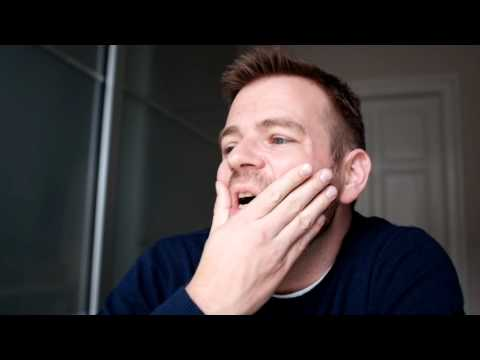

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("Rwakh-HXPJk",width=800, height=450)

> *Reading*: NLPP Chapter 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.9, and 3.10\. It's not important that you go in depth with everything here - the key thing is that you *know that Chapter 3 of this book exists*, and that it's a great place to return to if you're ever in need of an explanation of regular expressions, unicode, or other topics that you forget as soon as you stop using them (and don't worry, I forget about those things too).

> _Exercise_ 1: Just a couple of examples from the book: Work through the exercises NLPP 3.12: 6, 30.

**Exercise 6**

Describe the class of strings matched by the following regular expressions.

    [a-zA-Z]+
    [A-Z][a-z]*
    p[aeiou]{,2}t
    \d+(\.\d+)?
    ([^aeiou][aeiou][^aeiou])*
    \w+|[^\w\s]+

Test your answers using nltk.re_show().

In [3]:
import nltk

```[a-zA-Z]+```
* Words (length 1+) containing the lower case letters a to z or upper case letters A to Z


In [4]:
s = 'I am all legal words AnD YoU KNOw IT'
nltk.re_show('[a-zA-Z]+', s)

{I} {am} {all} {legal} {words} {AnD} {YoU} {KNOw} {IT}


```[A-Z][a-z]*```
* Two first letters of a word where the first letter must be a capital letter from A to Z and the next letter must be lower case from a to z


In [5]:
s = 'I Am Legal i am not legal!'
nltk.re_show('[A-Z][a-z]*', s)

{I} {Am} {Legal} i am not legal!


```p[aeiou]{,2}t```
* letter sequences (also within words) starting with p followed by 0 to 2 letters that must be either a, e, i, o, or u and then ending on t


In [6]:
s = 'pt pet pat pit put pot pait patti spet spat not valid paait spelt'
nltk.re_show('p[aeiou]{,2}t', s)

{pt} {pet} {pat} {pit} {put} {pot} {pait} {pat}ti s{pet} s{pat} not valid paait spelt


```\d+(\.\d+)?```
* Any integer or floating point number

In [7]:
s = 'This is the numbers: 3, 2.9, 1.95, 3.222222222222, 321234, 332132.3213123'
nltk.re_show('\d+(.\d+)?', s)

This is the numbers: {3}, {2.9}, {1.95}, {3.222222222222}, {321234}, {332132.3213123}


```([^aeiou][aeiou][^aeiou])*```
* Any sequence containing of a, e, i, o, or u where the left and right neighbors are not a, e, i, o, or u. It could also be the empty sequence (* means 0+ times)

In [8]:
valid_s = 'sas pet sit'
invalid_s = 'said spous'

nltk.re_show('([^aeiou][aeiou][^aeiou])*', valid_s)
nltk.re_show('([^aeiou][aeiou][^aeiou])*', invalid_s)

{sas}{} {pet}{} {sit}{}
{}s{}a{}i{}d{} {}s{}p{}o{}u{}s{}


```\w+|[^\w\s]+```
* Any letter word or any symbol such as ? or ! or any repeating sequence of a non-letter characters and space i.e. symbols, spaces and numbers

In [9]:
s = 'Valid! and also valid? Aaand ?!?!?! 123123'
nltk.re_show('\w+|[^\w\s]+', s)

{Valid}{!} {and} {also} {valid}{?} {Aaand} {?!?!?!} {123123}


**Exercise 30**
Use the Porter Stemmer to normalize some tokenized text, calling the stemmer on each word. Do the same thing with the Lancaster Stemmer and see if you observe any differences.

In [10]:
tweet = 'Social media & the press are currently incentivized to drastically exaggerate narratives of division. This in turn creates more division & the downward spiral continues. I hope to build tech that changes these incentives. I believe there is much more love than hate in the world.'

tokens = nltk.word_tokenize(tweet)

porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()

porter_stems = [porter.stem(t) for t in tokens]
lancaster_stems = [lancaster.stem(t) for t in tokens]

print('Porter Stemming')
print(porter_stems)

print('Lancaster Stemming')
print(lancaster_stems)

Porter Stemming
['social', 'media', '&', 'the', 'press', 'are', 'current', 'incentiv', 'to', 'drastic', 'exagger', 'narr', 'of', 'divis', '.', 'thi', 'in', 'turn', 'creat', 'more', 'divis', '&', 'the', 'downward', 'spiral', 'continu', '.', 'I', 'hope', 'to', 'build', 'tech', 'that', 'chang', 'these', 'incent', '.', 'I', 'believ', 'there', 'is', 'much', 'more', 'love', 'than', 'hate', 'in', 'the', 'world', '.']
Lancaster Stemming
['soc', 'med', '&', 'the', 'press', 'ar', 'cur', 'int', 'to', 'drast', 'exag', 'nar', 'of', 'divid', '.', 'thi', 'in', 'turn', 'cre', 'mor', 'divid', '&', 'the', 'downward', 'spir', 'continu', '.', 'i', 'hop', 'to', 'build', 'tech', 'that', 'chang', 'thes', 'int', '.', 'i', 'believ', 'ther', 'is', 'much', 'mor', 'lov', 'than', 'hat', 'in', 'the', 'world', '.']


### Prelude to part 2. -  Data.

In the follwing exercises, we will study the text contained in _r/wallstreebets_ submissions. To make things a bit more exciting, we will work with \**all** the submissions posted in 2020 in _r/wallstreebets_. As you may well guess, we will need both the title and the content of each submission.

To make things a bit less tedious for you guys, I downloaded and made avaialble the data you need (you can find it [here](https://github.com/lalessan/comsocsci2021/blob/master/data/wallstreet_subs.csv.gz)). The dataset consists of all the submissions posted between January 1st and December 31st 2020 with content in English. For each submission, you have the following information: timestamp of creation (__created_utc__), __title__, textual content (__selftext__), and __score__. You are welcome to use this data. If you prefer to download your own (see optional exercise below), that's even better!! As usual, I do not expect you to find a perfect match between your data and mine. In the exercises below, I refer to this data as the "_wallstreetbets submissions dataset_".

_Exercise (Optional)_: 

> * Download all submissions posted on _r/wallstreetbets_ in 2020 using [psaw](https://pypi.org/project/psaw/).
> * For each submission, keep the title, the textual content, the score, and the time of creation. 
> * Remove submissions whose content has been removed, and those that are not in English. You can use the library [langdetect](https://pypi.org/project/langdetect/) to detect the language of a given text.



# Part 2 - Words that characterize stocks discussed on r/wallstreetbets

In this section, we'll begin to play around with how far we can get with simple strategies for looking at text. The video is Sune talking about a fun paper, which shows you how little is needed in order to reveal something very interesting about humans that produce text. Then, we'll use a very simple weighting scheme called TF-IDF to find the words in the reddit r/wallstreetbets submissions that charachterize different stocks. In cleaning the Reddit submissions, we'll use some of the stuff you've just read about above. Finally, we'll even visualize them in a fun little word cloud (below is what I found for the discussions around Gamestop, Microsoft, and Tesla). The wordclouds may not be immediately understandable. But if you do some research on the important words, you will find that the TF-IDF method extracts quite interesting information.

<img src="https://github.com/lalessan/comsocsci2021/blob/master/files/wordclouds.png?raw=true" alt="Drawing" style="width: 1000px;"/>


> **Video lecture**: Simple methods reveal a lot. Sune talks a little bit about the paper: [Personality, Gender, and Age in the Language of Social Media: The Open-Vocabulary Approach](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0073791).  

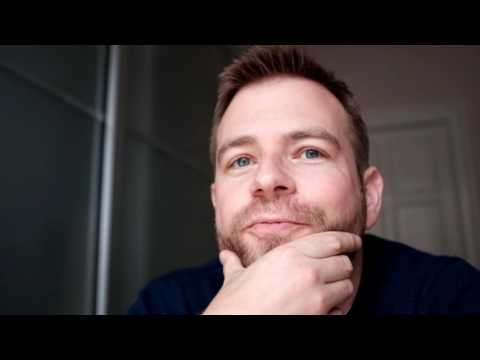

In [11]:
YouTubeVideo("wkYvdfkVmlI",width=800, height=450)

_Exercise 2: Most discussed stocks in r/wallstreebets_. GME is only one among many stocks people have discussed in _r/wallstreetbets_. In this exercise, we will find the most discussed stocks on _wallstreetbets_. Stocks are identified by their [Ticker symbol](https://en.wikipedia.org/wiki/Ticker_symbol). A Ticker symbol is nothing but a string consisting of letters and numbers, and is typically quite short. For example the Gamestop symbol is _GME_, Amazon is _AMZN_, Alphabet is _GOOGL_...

In [12]:
import nltk


> 1. To talk about a specific stock, Redditors often use the corresponding ticker symbol [preceded by the dollar sign](https://www.reddit.com/r/wallstreetbets/comments/5yvvue/why_do_you_put_a_dollar_sign_in_front_of_a_ticker/) (\$GME, \$AMZN...). Write down a [Regular Expression](https://en.wikipedia.org/wiki/Regular_expression) matching words that begin with a dollar sign "\\$". See [NLPP book, section 3.4]().

In [13]:
dollar_reg = '\$\w+'

> 2. Load the _wallstreetbets submission dataset_ as a Pandas DataFrame and create a new column containing both the title and the textual content of each submission (as one long string). We refer to this as the _text_ of the submission.

In [14]:
import pandas as pd

submissions = pd.read_csv('Data/week6/wallstreet_subs.csv', parse_dates=['created_utc'], 
                            date_parser=lambda d: pd.to_datetime(d, utc=True, unit='s'))

In [15]:
submissions['text'] = submissions.apply(lambda row: ' '.join([row.title, row.selftext]), axis=1)

> 3. For each submission, find all ticker symbols (those preceded by a dollar sign) contained in the _text_. Use the function [re.findall](https://docs.python.org/3/library/re.html), and the regular expression you created in point 1). Some tips for success: 
> > * Remove matches that are definetly not stock symbols (for example amounts like: \$100, \$1000k).
> > * Convert all matches to uppercase
> > * Remove the dollar sign at the beginning of the symbol (e.g. \$gme → GME).

In [16]:
import re

def isMoney(word):
    reg = '\d+(\.\d+)?(MM|K|B|MILLION|x+|STOCK)?'
    return re.match(reg, word)

dollar_sign_words = []

for t in submissions['text']:
    for w in re.findall(dollar_reg, t):
        w = w[1:].upper()
        if not isMoney(w) and len(w) < 6:
            dollar_sign_words.append(w)

In [17]:
print([d for d in dollar_sign_words if d == 'GME'])

['GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME', 'GME'

> 4. Create a list containing the top 15 Ticker Symbols by number of occurrences. GME should be among them. If it is not, check again your analysis and/or come talk to me. Google the top 15 symbols and find the corresponding company names. Are they known companies or not?

In [18]:
stock_freq = nltk.FreqDist(dollar_sign_words)
top15_stock = stock_freq[:15]
top15_stock

TypeError: unhashable type: 'slice'

_Exercise 3: TF-IDF and the stocks discussed on r/wallstreetbets._ The goal for this exercise is to find the words charachterizing each of the stocks discussed on r/wallstreetbets. We will focus on the top 15 stocks we idenfied in Exercise 2, and we will of course use TF-IDF.

> 1. First, check out [the wikipedia page for TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf). Explain in your own words the point of TF-IDF. 
>   * What does TF stand for? 
>   * What does IDF stand for?

TF-IDF is a way of expressing how important a word is for a specific document in a corpus. The TF-IDF statistic also takes into account how often a word is occuring across documents in the corpus. Such that a word which appears often in a single document is deemed more characteristic for the document if it does not occur often in other documents in the corpus. So a word like 'the' will occur often in a document. But, it will most likely occur often in many documents and so it is not characteristic.

TF - Term Frequency:\
The number of times a word occurs in a document. Often the term is also weighted according to the length of the text. Such that a long and a short text can still be compared.

IDF - Inverse Document Frequency:\
A factor which weights the search terms/words by diminishing the wieght of words that appear often across different documents in the corpus and increases the weight of words that rarely occurs across the different documents in the corpus.

> 2. Tokenize the __text__ of each submission. Create a column __tokens__ in your dataframe containing the tokens. Remember the bullets below for success.
>   * If you dont' know what _tokenization_ means, go back and read Chapter 3 again. **The advice to go back and check Chapter 3 is valid for every cleaning step below**.
>   * Exclude punctuation.
>   * Exclude URLs
>   * Exclude stop words (if you don't know what stop words are, go back and read NLPP1e again).
>   * Exclude numbers (since they're difficult to interpret in the word cloud).
>   * Set everything to lower case.
>   * **Note** that none of the above has to be perfect. And there's some room for improvisation. You can try using stemming. In my own first run the results didn't look so nice, because some submissions repeat certain words again and again and again, whereas other are very short. For that reason, I decided to use the unique set of words from each submission rather than each word in proportion to how it's actually used. Choices like that are up to you.

In [18]:
import nltk
from nltk.corpus import stopwords
import validators
import re

stop_words = stopwords.words('english')

def tokenize(text):
    tokens = []

    for t in nltk.tokenize.word_tokenize(text):
        if (not validators.url(t) and t not in stop_words 
            and not re.match('\d+(.\d+)?', t)):
            t = t.replace('.', '').strip().lower()
            tokens.append(t)

    return tokens 


submissions['tokens'] = submissions['text'].apply(tokenize)

In [19]:
submissions.head(3)

,created_utc,title,selftext,score,text,tokens
0,2020-04-06 11:50:11+00:00,What is the Fed actually buying?,"Okay, I may actually just be retarded. On my d...",1,"What is the Fed actually buying? Okay, I may a...","[what, fed, actually, buying, ?, okay, ,, i, m..."
1,2020-04-06 11:42:00+00:00,I didn’t learn about puts because I was lazy,"Beginning of the this virus shit, everyone was...",1,I didn’t learn about puts because I was lazy B...,"[i, ’, learn, puts, i, lazy, beginning, virus,..."
2,2020-04-06 11:41:08+00:00,HOT TAKE,Literally everyone has free time on their hand...,1,HOT TAKE Literally everyone has free time on t...,"[hot, take, literally, everyone, free, time, h..."


> 3. Find submissions discussing at least one of the top 15 stocks you identified above. To do so: 
> > * Create a function that finds the intersection between a list of tokens and your list of top 15 stocks. For example, your function applied to the tokens: _"[Here, TSLA, submission, GME]"_ should return ["TSLA","GME"]. (_Optional_: you can also try to included cases in which the list of tokens contains a company name among your top 15. For example the function applied to _"[Here, Gamestop, submission]"_ could return ['GME'].)
> > * Create a new column _stock_ in your DataFrame, containing the output of your function applied to the _text_ column. Values in this column should be lists. 
> > * Handle cases where one post discusses more than one stock by applying the function [__explode__](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.explode.html) to the _stock_ column. This will duplicate submissions associated to multiple stocks. After exploding, the values included in the _stock_ column should be strings. 
> > * Handle cases where none of the selected stocks is discussed by replacing Nan values, for example with "Other".

In [20]:
import nltk

def intersection(text, word_list):
    return [w for w in nltk.tokenize.word_tokenize(text) if w in word_list]

In [21]:
submissions['stock'] = submissions.text.apply(lambda text: intersection(text.upper(), top15_stock))
submissions = submissions.explode('stock')
submissions['stock'] = submissions['stock'].apply(lambda x: 'Other' if pd.isna(x) else x)

In [22]:
submissions.head(20)

,created_utc,title,selftext,score,text,tokens,stock
0,2020-04-06 11:50:11+00:00,What is the Fed actually buying?,"Okay, I may actually just be retarded. On my d...",1,"What is the Fed actually buying? Okay, I may a...","[what, fed, actually, buying, ?, okay, ,, i, m...",Other
1,2020-04-06 11:42:00+00:00,I didn’t learn about puts because I was lazy,"Beginning of the this virus shit, everyone was...",1,I didn’t learn about puts because I was lazy B...,"[i, ’, learn, puts, i, lazy, beginning, virus,...",Other
2,2020-04-06 11:41:08+00:00,HOT TAKE,Literally everyone has free time on their hand...,1,HOT TAKE Literally everyone has free time on t...,"[hot, take, literally, everyone, free, time, h...",Other
3,2020-04-06 11:30:39+00:00,Fuck you Gordon,"Gordon I believed in you, I can't even begin t...",1,"Fuck you Gordon Gordon I believed in you, I ca...","[fuck, gordon, gordon, i, believed, ,, i, ca, ...",Other
4,2020-04-06 11:17:02+00:00,Can’t find a picture,Someone uploaded a ohoto of the stock market h...,1,Can’t find a picture Someone uploaded a ohoto ...,"[can, ’, find, picture, someone, uploaded, oho...",Other
5,2020-04-06 11:12:15+00:00,Jamie Dimon has joined the bull gang. CNBC: “J...,https://www.cnbc.com/2020/04/06/jamie-dimon-de...,1,Jamie Dimon has joined the bull gang. CNBC: “J...,"[jamie, dimon, joined, bull, gang, , cnbc, :, ...",Other
6,2020-04-06 11:11:55+00:00,Gauise... Gaise listen... I think Larry Fink i...,[https://www.google.de/amp/s/www.cnbc.com/amp/...,1,Gauise... Gaise listen... I think Larry Fink i...,"[gauise, , gaise, listen, , i, think, larry, f...",Other
7,2020-04-06 11:05:51+00:00,"Daily Discussion Thread - April 06, 2020",Your daily trading discussion thread. Please k...,1,"Daily Discussion Thread - April 06, 2020 Your ...","[daily, discussion, thread, -, april, ,, your,...",Other
8,2020-04-06 11:05:50+00:00,The Big Bubble Keeps Getting Bigger - Junk Bonds,[https://www.cnbc.com/2020/04/06/investing-in-...,1,The Big Bubble Keeps Getting Bigger - Junk Bon...,"[the, big, bubble, keeps, getting, bigger, -, ...",Other
9,2020-04-06 10:59:35+00:00,SPY PREDICTION- I'M 100% SURE THAT I MIGHT BE ...,How in the fuck did we actually miss the botto...,1,SPY PREDICTION- I'M 100% SURE THAT I MIGHT BE ...,"[spy, prediction-, i, 'm, %, sure, that, i, mi...",SPY


> 4. Now, we want to find out which words are important for each *stock*, so we're going to create several ***large documents, one for each stock***. Each document includes all the tokens related to the same stock. We will also have a document including discussions that do not relate to the top 15 stocks.

In [23]:
def concat(series):
    document = []
    for tokens in series:
        document += tokens
    
    return document

stock_documents = submissions.groupby('stock')['tokens'].apply(concat)

In [24]:
stock_documents

stock
AAPL     [spx, :, likely, go, higher, week-, do, n't, f...
AMD      [companies, likely, still, beat, earnings, q1,...
AMZN     [is, shorting, exciting, pass, guys, ?, i, und...
BA       [here, positions, commented, last, hours, --, ...
BABA     [question, theta, gang, theta, gang, ,, come, ...
DIS      [any, canadian, trading, us, options, stock, e...
GME      [here, positions, commented, last, hours, --, ...
MSFT     [here, positions, commented, last, hours, --, ...
NIO      [chinese, adrs, :, if, ca, n't, say, something...
Other    [what, fed, actually, buying, ?, okay, ,, i, m...
PLTR     [pltr, vs, dkng, theory, pluto, mission, -2022...
ROPE     [don, ’, sell, otm, puts, tomorrow, morning, i...
SPCE     [psa, :, market, closed, due, empty, ink, cart...
SPY      [spy, prediction-, i, 'm, %, sure, that, i, mi...
TSLA     [any, canadian, trading, us, options, stock, e...
ZM       [thoughts, zm, puts, currently, pe, ratio, ’, ...
Name: tokens, dtype: object

> 5. Now, we're ready to calculate the TF for each word. Use the method of your choice to find the top 5 terms within __5 stocks of your choice__. 
>   * Describe similarities and differences between the stocks.
>   * Why aren't the TFs not necessarily a good description of the stocks?
>   * Next, we calculate IDF for every word. 
>   * What base logarithm did you use? Is that important?

In [43]:
import nltk

TSLA_Freq_Dist = nltk.FreqDist(stock_documents['TSLA'])
print(f'TSLA: {list(TSLA_Freq_Dist)[:15]}')

GME_Freq_Dist = nltk.FreqDist(stock_documents['GME'])
print(f'GME: {list(GME_Freq_Dist)[:15]}')

MSFT_Freq_Dist = nltk.FreqDist(stock_documents['MSFT'])
print(f'MSFT: {list(MSFT_Freq_Dist)[:15]}')

AMZN_Freq_Dist = nltk.FreqDist(stock_documents['AMZN'])
print(f'AMZN: {list(AMZN_Freq_Dist)[:15]}')

AAPL_Freq_Dist = nltk.FreqDist(stock_documents['AAPL'])
print(f'AAPL: {list(AAPL_Freq_Dist)[:15]}')

TSLA: [',', '', ')', '(', '*', ']', '[', 'tsla', '$', ':', 'i', ';', '&', 'amp', '#']
GME: ['', ',', '*', 'i', 'gme', ')', '(', ':', '’', '$', ';', '?', '&', '[', ']']
MSFT: [',', ')', '(', ']', '[', '*', '', '--', '$', ';', ':', 'i', '#', '&', 'msft']
AMZN: [',', ')', '(', '', '*', '[', ']', ':', '$', ';', '#', '&', 'i', 'https', '%']
AAPL: ['*', ',', '', ')', '(', ':', '#', ';', '[', ']', '&', '$', 'i', 'aapl', 'amp']


> 6. We're ready to calculate TF-IDF. Do that for the __5 stock of your choice__. 
>   * List the 10 top TF words for each stock.
>  * List the 10 top TF-IDF words for each stock.
>   * Are these 10 words more descriptive of the stock? If yes, what is it about IDF that makes the words more informative?

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

text_stock_documents = stock_documents.apply(lambda doc: ' '.join(doc))

tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(text_stock_documents)

In [69]:
def print_top(stock, top=10):
    df = pd.DataFrame(tfIdf[stock].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
    df = df.sort_values('TF-IDF', ascending=False)
    print (df.head(top))

In [73]:
print('TSLA')
print_top(14) #TSLA
print('\nGME')
print_top(6) #GME
print('\nMSFT')
print_top(7) #MSFT
print('\nAMZN')
print_top(2) #AMZN
print('\nAAPL')
print_top(0) #AAPL

TSLA
                  TF-IDF
wallstreetbets  0.565936
comments        0.565646
tsla            0.364739
amp             0.180086
https           0.150124
the             0.084383
stock           0.077490
tesla           0.070066
spy             0.067878
market          0.065011

GME
            TF-IDF
gme       0.566540
https     0.221501
amp       0.200297
short     0.196806
gamestop  0.161097
the       0.154072
shares    0.141676
cohen     0.133128
long      0.132281
squeeze   0.113719

MSFT
                                              TF-IDF
comments                                    0.666544
wallstreetbets                              0.665804
msft                                        0.121529
what_are_your_moves_tomorrow_april_30_2020  0.084146
gagmei                                      0.084146
spy                                         0.082602
amp                                         0.080703
the                                         0.059249
https                  

The TF-IDF is much more informative, because all the "common" words across the documents are now filered out.

 _Exercise 4: The Wordcloud_. It's time to visualize our results!

> * Install the [`WordCloud`](https://pypi.org/project/wordcloud/) module. 
> * Now, create word-cloud for each stock. Feel free to make it as fancy or non-fancy as you like. 
> * Comment on the results. Are these words to be expected? Is there anything that is surprising? 

In [90]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(stock):
    text = ' '.join(stock_documents[stock])
    wordcloud = WordCloud().generate(text)

    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40).generate(text)
    fig, ax = plt.subplots(figsize=(15,5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [91]:
stock_documents.keys()

Index(['AAPL', 'AMD', 'AMZN', 'BA', 'BABA', 'DIS', 'GME', 'MSFT', 'NIO',
       'Other', 'PLTR', 'ROPE', 'SPCE', 'SPY', 'TSLA', 'ZM'],
      dtype='object', name='stock')

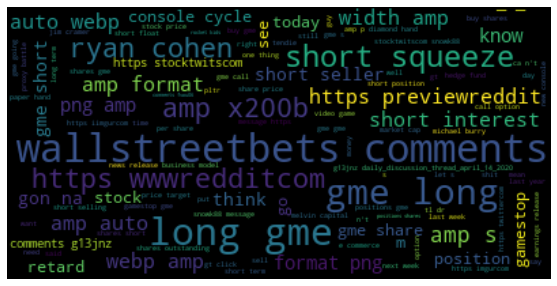

In [94]:
plot_wordcloud('GME')

_Exercise 5: A Study Project in Computational Social Science._
> 1. Read the [Project Assignment](https://github.com/lalessan/comsocsci2021/wiki/Project-Assignment) page, where I explain how to set up a Study Project.
> 2. Think of a topic of interest to your would like to study using data downloaded from the Web (Wikipedia, Twitter, Reddit, Facebook, Github, other data sources...), and some of the methods we have seen in this course. 
> 3. What is the topic? 
> 4. What is the data? 
> 5. Write down 3 research questions related to your topic that you would like to investigate.
> 6. Put together 1 slide including the answers to points 3,4,5.

__Important__: This will be by no means the final choice for your Project Assignment. All I want is for you guys to start thinking about it.